In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import matplotlib.cm as cmap
matplotlib.rc('font', family='Arial')
subs = np.linspace(0.0, 0.9, 4)
colors = [cmap.viridis(x) for x in subs]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [2]:
def plot(data, sortkey=None, legendtitle=None, titleextra='', legend_loc='right'):
    """expect data to be label -> loaded results.txt"""
    plt.figure(figsize=(5,5))
    for label in sorted(data, key=sortkey):
        if len(data[label].shape) > 1:
            plt.plot(np.arange(data[label].shape[0]), data[label][:, 1], label=label)
        else:
            print('problem with {}'.format(label))
    plt.legend(loc=legend_loc, title=legendtitle)
    plt.xlabel('Epoch')
    plt.ylabel('Validation accuracy')
    plt.title('Validation accuracy by epoch' + titleextra)
    plt.yticks(np.arange(11) * 0.1)
    plt.xlim((0, 100))

In [3]:
def load_file(path):
    """load a results.txt"""
    with open(path) as fp:
        data = [line.split(',') for line in fp]
        data = [[float(val) for val in line] for line in data]
    if data[-1][1] == 0.0:
        data = data[:-1]
    return np.array(data)

In [11]:
data = {
    'lstm': load_file('../mnist_results/prelims/lstm-10/results.txt'),
    'vanilla': load_file('../mnist_results/prelims/vanilla-10/results.txt'),
    'irnn': load_file('../mnist_results/prelims/irnn-10/results.txt'),
    'gmrnn': load_file('../mnist_results/additive/baselinevanillaspec0999lr01/results.txt'),
    'cp+ 10': load_file('../mnist_results/additive/spec0999relu10_bigdecay/results.txt')
}

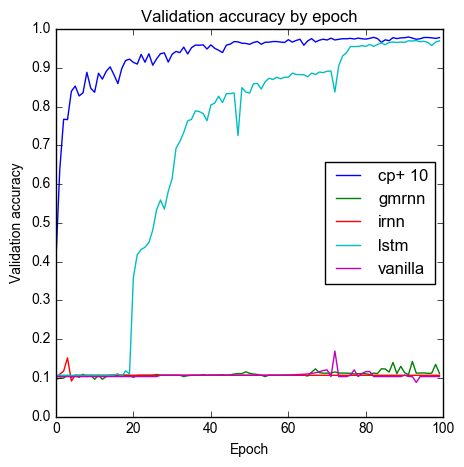

In [12]:
plot(data)

In [13]:
data = {
    '1': load_file('../mnist_results/additive/spec0999relu1_bigdecay/results.txt'),
    '10': load_file('../mnist_results/additive/spec0999relu10_bigdecay/results.txt'),
    '25': load_file('../mnist_results/additive/spec0999relu25_bigdecay/results.txt'),
    '50': load_file('../mnist_results/additive/spec0999relu50_bigdecay/results.txt'),
    '100': load_file('../mnist_results/additive/spec0999relu100_bigdecay/results.txt'),
    '150': load_file('../mnist_results/additive/spec0999relu150_bigdecay/results.txt')   
}

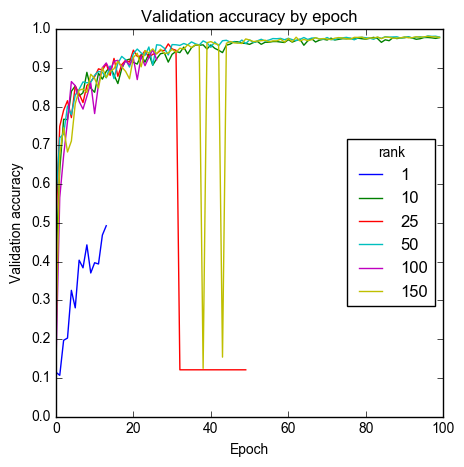

In [14]:
plot(data, sortkey=int, legendtitle='rank')

In [15]:
data = {
    '5': load_file('../mnist_results/grid_runs_permute/2/output/results.txt'),
    '25': load_file('../mnist_results/grid_runs_permute/3/output/results.txt'),
    '50': load_file('../mnist_results/grid_runs_permute/4/output/results.txt'),
    '75': load_file('../mnist_results/grid_runs_permute/5/output/results.txt'),
    '100': load_file('../mnist_results/grid_runs_permute/6/output/results.txt')
}

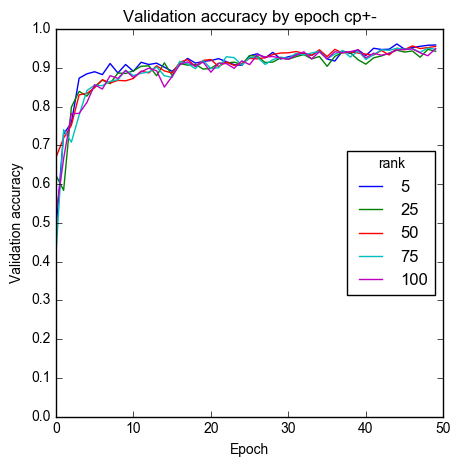

In [16]:
plot(data, sortkey=int, legendtitle='rank', titleextra=' cp+-')

In [17]:
data = {
    '5': load_file('../mnist_results/grid_runs_permute/grad1_8/output/results.txt'),
    '25': load_file('../mnist_results/grid_runs_permute/grad1_9/output/results.txt'),
    '50': load_file('../mnist_results/grid_runs_permute/grad1_10/output/results.txt'),
    '75': load_file('../mnist_results/grid_runs_permute/grad1_11/output/results.txt'),
    '100': load_file('../mnist_results/grid_runs_permute/grad1_12/output/results.txt')
}

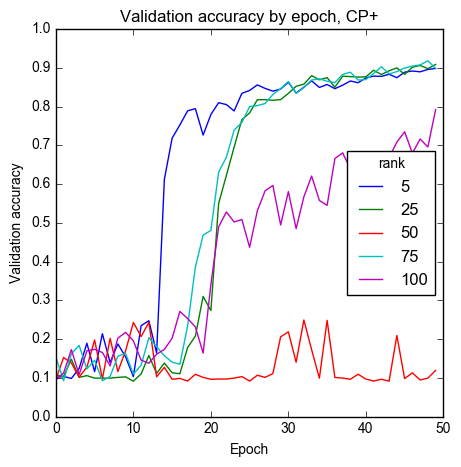

In [18]:
plot(data, sortkey=int, legendtitle='rank', titleextra=', CP+')

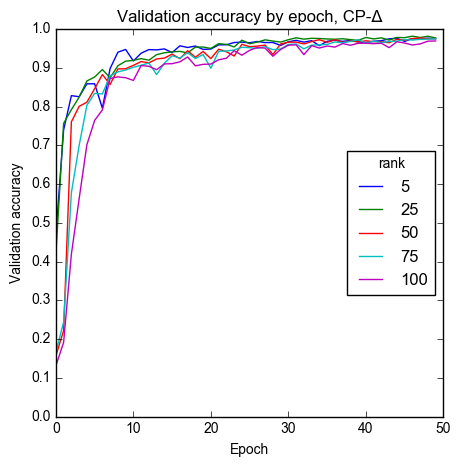

In [19]:
data = {
    '5': load_file('../mnist_results/grid_runs_permute/grad1_2/output/results.txt'),
    '25': load_file('../mnist_results/grid_runs_permute/grad1_3/output/results.txt'),
    '50': load_file('../mnist_results/grid_runs_permute/grad1_4/output/results.txt'),
    '75': load_file('../mnist_results/grid_runs_permute/grad1_5/output/results.txt'),
    '100': load_file('../mnist_results/grid_runs_permute/grad1_6/output/results.txt')
}
plot(data, sortkey=int, legendtitle='rank', titleextra=', CP-Δ')

problem with 5


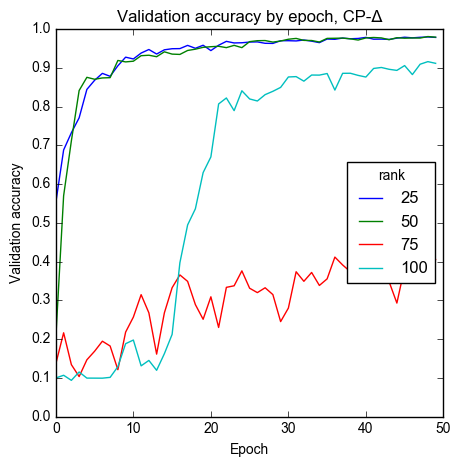

In [20]:
data = {
    '5': load_file('../mnist_results/grid_runs_permute/lowlr_1/output/results.txt'),
    '25': load_file('../mnist_results/grid_runs_permute/lowlr_2/output/results.txt'),
    '50': load_file('../mnist_results/grid_runs_permute/lowlr_3/output/results.txt'),
    '75': load_file('../mnist_results/grid_runs_permute/lowlr_4/output/results.txt'),
    '100': load_file('../mnist_results/grid_runs_permute/lowlr_6/output/results.txt')
}
plot(data, sortkey=int, legendtitle='rank', titleextra=', CP-Δ')

In [21]:
data = {
    'LSTM': load_file('../mnist_results/perms/lstm-150/results.txt'),
    'IRNN': load_file('../mnist_results/perms/irnn-150/results.txt'),
    'vanilla': load_file('../mnist_results/perms/vanilla-150/results.txt'),
    'CP-Δ': load_file('../mnist_results/grid_runs_permute/lowlr_3/output/results.txt'),
    'CP+': load_file('../mnist_results/grid_runs_permute/lowlr_6/output/results.txt'),
}

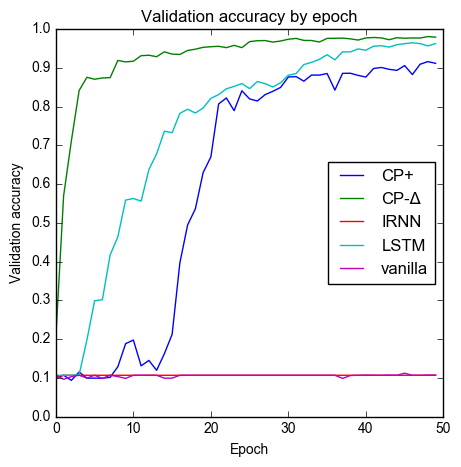

In [22]:
plot(data)

# I am convinced that the above are not actually on permuted

In [5]:
def load_gridruns(outer_dir, best_by=None):
    runs = os.listdir(outer_dir)
    print('Got {} runs'.format(len(runs)))
    
    data_dict = {}
    best_test  = {}
    best_names = {}
    for run in runs:
        run_dir = os.path.join(outer_dir, run)
        details_file = os.path.join(run_dir, 'model_details.txt')
        if not os.path.exists(details_file):
            print('Run {} really failed'.format(run))
            continue
        with open(details_file) as fp:
            cell, rank, lr, gc = fp.read().strip().split(', ')
            rank = rank.split(' ')[-1]
            lr = lr.split(' ')[-1]
            gc = gc.split(' ')[-1]
        run_name = '{} ({}), {}, {}'.format(cell, rank, lr, gc)
        # now get the actual results
        
        # start by seeing if we want it
        if best_by:
            test_file = os.path.join(run_dir, 'output', 'test.txt')
            if not os.path.exists(test_file):
                print('{} has no test file'.format(run_name))
                continue
            with open(test_file) as fp:
                test_acc = float(fp.read())
                
            #print(run_name + ': {}'.format(test_acc))
            if best_by == 'cell':
                key = cell
            elif best_by == 'rank':
                key = rank
            else: # both
                key = cell + ', ' + rank
            
            if key not in best_test or best_test[key] < test_acc:
                best_test[key] = test_acc
                best_names[key] = run_name
            
        results_file = os.path.join(run_dir, 'output', 'results.txt')
        if os.path.exists(results_file):
            valid_results = load_file(results_file)
            data_dict[run_name] = valid_results
        else:
            print('{} has no results'.format(run_name))
    if best_by:
        data_dict = {key: data_dict[key]
                     for key in data_dict 
                     if key in best_names.values()}
        print('~~~best results')
        for key in best_test:
            print('{}: {}'.format(best_names[key], best_test[key]))
    return data_dict

Got 28 runs
cp+- (25), 0.01, 10.0 has no results
cp+- (25), 0.001, 1.0 has no results
cp+- (100), 0.001, 1.0 has no results
cp+ (1), 0.01, 10.0 has no results
problem with cp+- (1), 0.001, 10.0
problem with cp+- (1), 0.01, 1.0
problem with cp+- (1), 0.01, 10.0


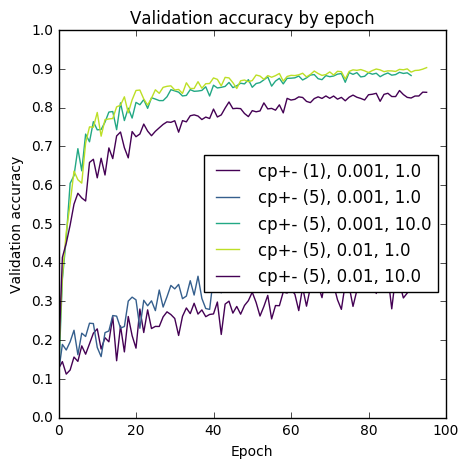

In [6]:
data_dict = load_gridruns('../mnist_results/grid_runs_permute_round2_adam/')
plot({key: data_dict[key] for key in data_dict if 'cp+-' in key})

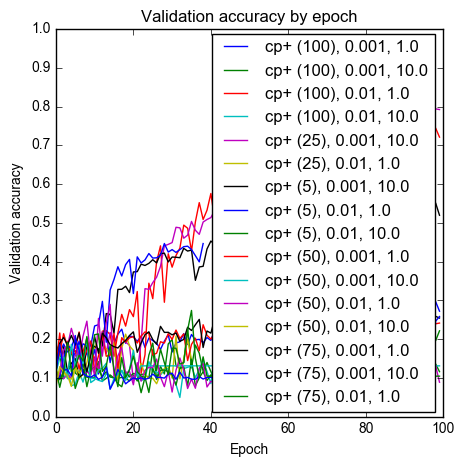

In [68]:
plot({key: data_dict[key] for key in data_dict if '-' not in key})

Got 44 runs
cp+- (1), 0.01, 1.0 has no test file
cp+- (25), 0.01, 10.0 has no test file
cp+- (25), 0.001, 1.0 has no test file
cp+- (50), 0.01, 10.0 has no test file
cp+- (50), 0.001, 1.0 has no test file
cp+- (50), 0.001, 10.0 has no test file
cp+- (75), 0.01, 10.0 has no test file
cp+- (1), 0.01, 10.0 has no test file
cp+- (100), 0.01, 1.0 has no test file
cp+- (100), 0.01, 10.0 has no test file
cp+- (100), 0.001, 1.0 has no test file
cp+- (100), 0.001, 10.0 has no test file
cp+ (1), 0.01, 10.0 has no test file
cp+- (1), 0.001, 1.0 has no test file
cp+ (5), 0.001, 10.0 has no test file
cp+ (25), 0.01, 10.0 has no test file
cp+ (25), 0.001, 10.0 has no test file
cp+- (1), 0.001, 10.0 has no test file
Run 45 really failed
Run 46 really failed
Run 47 really failed
Run 48 really failed
cp+- (5), 0.01, 1.0 has no test file
cp+- (5), 0.01, 10.0 has no test file
cp+- (5), 0.001, 1.0 has no test file
cp+- (5), 0.001, 10.0 has no test file
~~~best results
cp+ (25), 0.01, 1.0: 0.70299999713897

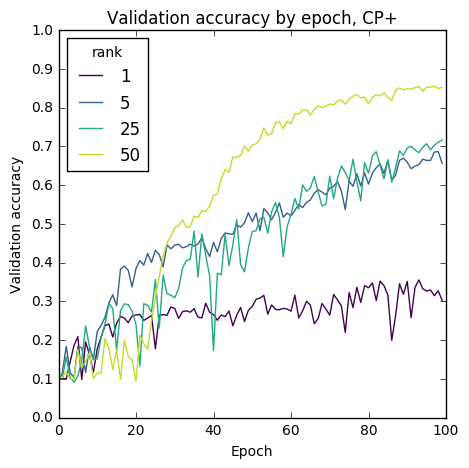

In [8]:
data_dict = load_gridruns('../mnist_results/grid_runs_permute_round2/', best_by='abcdef')
data_dict = dict(pair for pair in data_dict.items() if '-' not in pair[0])
cleaned_data = {}
best_cpplus = data_dict['cp+ (50), 0.001, 10.0']
for key in data_dict:
    new_key = int(key.split(' ')[1][1:-2])
    if new_key != 75:
        cleaned_data[new_key] = data_dict[key]
plot(cleaned_data, titleextra=', CP+', legend_loc='best', legendtitle='rank')

Got 43 runs
cp-del (5), 0.1, 10.0 has no test file
cp-del (5), 0.1, 1000.0 has no test file
cp-del (25), 0.01, 10.0 has no test file
cp-del (25), 0.01, 1000.0 has no test file
cp-del (25), 0.1, 1.0 has no test file
cp-del (25), 0.1, 1000.0 has no test file
cp-del (50), 0.01, 1.0 has no test file
cp-del (50), 0.1, 10.0 has no test file
cp-del (50), 0.1, 1000.0 has no test file
cp-del (75), 0.01, 1.0 has no test file
cp-del (75), 0.01, 10.0 has no test file
cp-del (75), 0.01, 1000.0 has no test file
cp-del (75), 0.1, 1.0 has no test file
cp-del (75), 0.1, 10.0 has no test file
cp-del (1), 0.01, 1000.0 has no test file
cp-del (100), 0.01, 1.0 has no test file
cp-del (100), 0.01, 10.0 has no test file
cp-del (100), 0.01, 1000.0 has no test file
cp-del (100), 0.1, 1.0 has no test file
cp-del (100), 0.1, 10.0 has no test file
cp-del (100), 0.1, 1000.0 has no test file
cp-del (101), 0.01, 1.0 has no test file
cp-del (101), 0.01, 10.0 has no test file
cp-del (101), 0.01, 1000.0 has no test fil

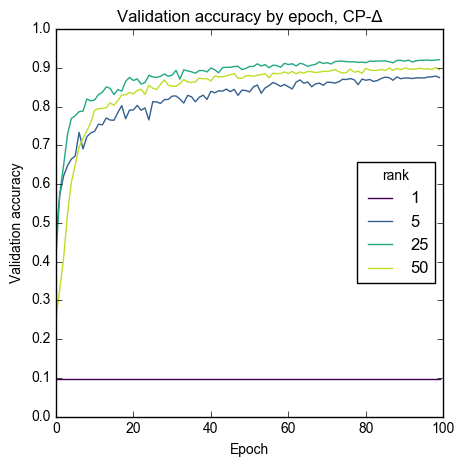

In [14]:
data_dict = load_gridruns('../mnist_results/grid_runs_permute_cp-del_partial/', best_by='rank')
cleaned_data = {}
best_cpdel = data_dict['cp-del (25), 0.1, 10.0']
for key in data_dict:
    new_key = int(key.split(' ')[1][1:-2])
    cleaned_data[new_key] = data_dict[key]
plot(cleaned_data, titleextra=', CP-Δ', legend_loc='best', legendtitle='rank')

Got 47 runs
cp-gate (50), 0.1, 10.0 has no test file
cp-gate (100), 0.01, 1000.0 has no test file
~~~best results
cp-gate (75), 0.001, 1.0: 0.8817000013589859
cp-gate (50), 0.001, 1000.0: 0.880200001001358
cp-gate (100), 0.001, 1.0: 0.8779999977350235
cp-gate (1), 0.001, 10.0: 0.8062000000476837
cp-gate (5), 0.01, 1.0: 0.8736000007390976
cp-gate (25), 0.01, 1000.0: 0.8739000016450882


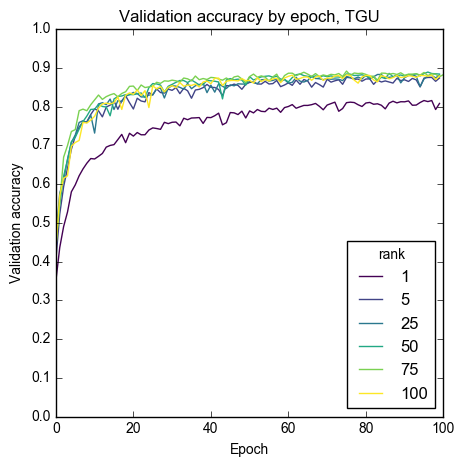

In [16]:
subs = np.linspace(0.0, 1.0, 6)
colors = [cmap.viridis(x) for x in subs]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

data_dict = load_gridruns('../mnist_results/grid_runs_permute_cp-interpgate/', best_by='rank')
cleaned_data = {}
best_tgu = data_dict['cp-gate (75), 0.001, 1.0']
for key in data_dict:
    new_key = int(key.split(' ')[1][1:-2])
    cleaned_data[new_key] = data_dict[key]
plot(cleaned_data, legendtitle='rank', legend_loc='lower right', titleextra=', TGU')

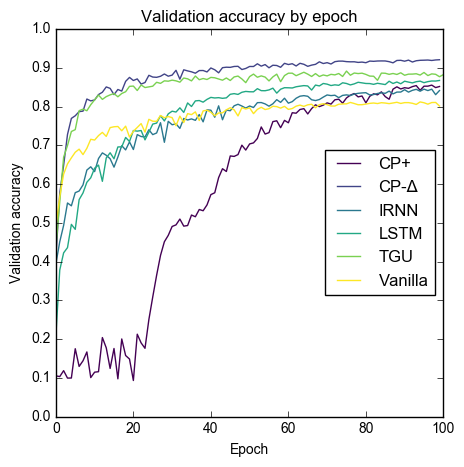

In [17]:
# now we have to put together the big boy
final_data = {
    'LSTM': load_file('../mnist_results/perms2/lstm-100/results.txt'),
    'IRNN': load_file('../mnist_results/perms2/irnn-100/results.txt'),
    'Vanilla': load_file('../mnist_results/perms2/vanilla-100/results.txt'),
    'TGU': best_tgu,
    'CP+': best_cpplus,
    'CP-Δ': best_cpdel
}
plot(final_data)